In [64]:
library("ggplot2")
num_trials <- 1000
sample_size <- 50
num_resamples <- 1000

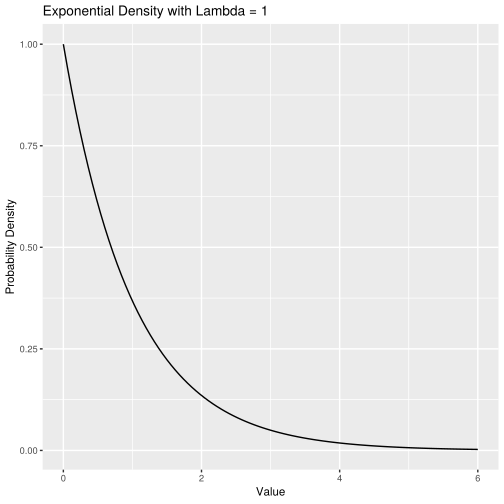

In [65]:
df <- data.frame(Value=seq(0,6,by=0.1))
ggplot(df) + stat_function(aes(Value),fun=dexp) + labs(title = "Exponential Density with Lambda = 1", x = "Value", y = "Probability Density")

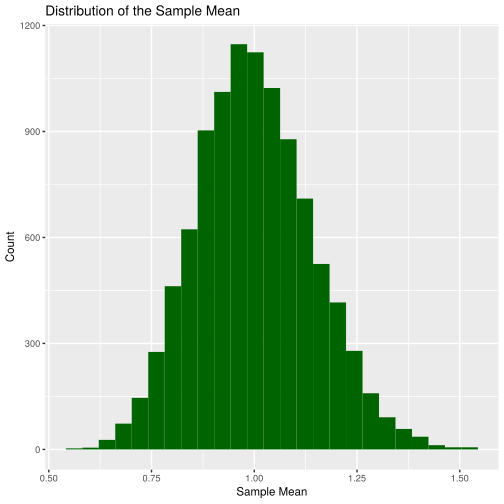

In [71]:
qplot(colMeans(sapply(rep(50,10000),rexp,rate=1)),
      bins=25,fill=I("darkgreen"),main="Distribution of the Sample Mean",xlab="Sample Mean",ylab="Count")

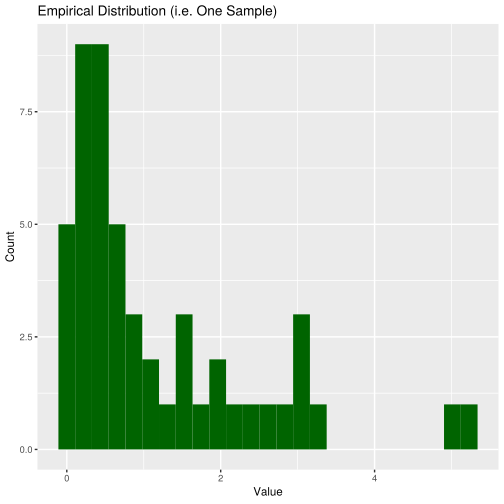

In [69]:
qplot(sapply(rep(1,50),rexp,rate=1),
      bins=25,fill=I("darkgreen"),main="Empirical Distribution (i.e. One Sample)",xlab="Value",ylab="Count")

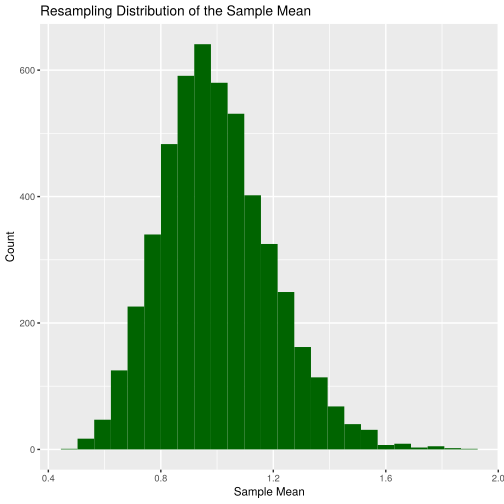

In [70]:
qplot(colMeans(replicate(5000,sample(sapply(rep(1,50),rexp,rate=1),50,replace=TRUE))),
      bins=25,fill=I("darkgreen"),main="Resampling Distribution of the Sample Mean",xlab="Sample Mean",ylab="Count")

In [72]:
#Collect samples from an exponential distribution with parameter lambda = 1.
samples <- replicate(num_trials, rexp(sample_size, rate = 1))
contained_count = 0

#For each sample we've collected...
for (i in 1:ncol(samples)) {
	#Perform random resampling with replacement, and calculate the mean of each resample.
	resamples <- replicate(num_resamples, sample(samples[,i], sample_size, replace = TRUE))
	means <- sort(colMeans(resamples))
	#The endpoints of a 90% confidence interval (i.e. the 5th and 95th percentiles of 
	#the resampling distribution) are the 50th lowest and 50th highest values obtained
	#since we took a total of 1000 resamples.
	left_end = means[50]
	right_end = means[950]
	#Increment if the interval contains the true mean of the underlying distribution.
	if ((left_end < 1) && (right_end > 1)) {
		contained_count <- contained_count + 1
	}
}

contained_count

893

In [73]:
#Collect samples from an exponential distribution with parameter lambda = 2.
samples <- replicate(num_trials, rexp(sample_size, rate = 1))
contained_count = 0

#For each sample we've collected...
for (i in 1:ncol(samples)) {
	sample_mean <- mean(samples[,i])
	sample_sd <- sd(samples[,i])
	#Compute the endpoints of a 90% confidence interval computed using critical values
	#from the T-distribution (which, with 49 degrees of freedom, is about 1.68).
	left_end = sample_mean - 1.68 * (sample_sd/sqrt(50))
	right_end = sample_mean + 1.68 * (sample_sd/sqrt(50))
	#Increment if the interval contains the true mean of the underlying distribution.
	if ((left_end < 1) && (right_end > 1)) {
		contained_count <- contained_count + 1
	}
}

contained_count

889